# Exercise: Exploratory Data Analysis with Pandas
## Instructions
1. Data Collection
    - Search and collect data on the following: (1993 - 2023)
        - Israel interest tares
        - US interest rates
        - USD to ILS exchange rates
    - For each dataset, create a pandas DataFrame with the following columns:
        - Year
        - Month
        - Current_Rate (Interest rate or exchange rate for that month)
        - Change_From_Last_Month (Difference in Current_Rate from the previous month)
        - Optional: You may include additional columns if you find them useful (e.g., Change_Percentage, Date).




In [157]:
# your code here
import pandas as pd
import numpy as np


url_dolar_shekel = 'additional_rates_19930903_20241107_he_USD.csv' 
USD = pd.read_csv(url_dolar_shekel)


url_ribit_israel = 'BR.csv'
ribit = pd.read_csv(url_ribit_israel)


url_ribit_usa = 'fed-funds-rate-historical-chart.csv'
U_S_A_ribit = pd.read_csv(url_ribit_usa)

USD["תאריך   "] = pd.to_datetime(USD["תאריך   "],errors="coerce")
last_usd = USD[USD["תאריך   "].dt.day== 1]
last_usd = last_usd.copy()  
last_usd["year"] = last_usd["תאריך   "].dt.year
last_usd["month"] = last_usd["תאריך   "].dt.month
last_usd["chang_between_months"] = last_usd["USD"] - last_usd["USD"].shift()
last_usd = last_usd[["year","month","USD","chang_between_months"]]


U_S_A_ribit["date"] = pd.to_datetime(U_S_A_ribit["date"],errors="coerce")
lastU_S_A_ribit = U_S_A_ribit[U_S_A_ribit["date"].dt.day== 1]
lastU_S_A_ribit = lastU_S_A_ribit.copy()  
lastU_S_A_ribit["year"] = lastU_S_A_ribit["date"].dt.year
lastU_S_A_ribit["month"] = lastU_S_A_ribit["date"].dt.month
lastU_S_A_ribit["chang_between_months"] = lastU_S_A_ribit[" value"] - lastU_S_A_ribit[" value"].shift()
lastU_S_A_ribit = lastU_S_A_ribit[["year","month"," value","chang_between_months"]]



ribit["TIME_PERIOD"] = pd.to_datetime(ribit["TIME_PERIOD"],errors="coerce")
last_ribit = ribit[ribit["TIME_PERIOD"].dt.day== 1]
last_ribit = last_ribit.copy() 
last_ribit["year"] = last_ribit["TIME_PERIOD"].dt.year
last_ribit["month"] = last_ribit["TIME_PERIOD"].dt.month
last_ribit["chang_between_months"] = last_ribit["OBS_VALUE"] - last_ribit["OBS_VALUE"].shift()
last_ribit = last_ribit[["year","month","OBS_VALUE","chang_between_months"]]
last_ribit

lastU_S_A_ribit
last_ribit

,year,month,OBS_VALUE,chang_between_months
27,1994,6,11.50,NaN
57,1994,7,12.00,0.50
88,1994,8,12.50,0.50
119,1994,9,14.00,1.50
149,1994,10,15.50,1.50
...,...,...,...,...
10833,2024,1,4.75,0.00
10864,2024,2,4.50,-0.25
10893,2024,3,4.50,0.00
10924,2024,4,4.50,0.00


## Part A: Single DataFrame Analysis 
1. Display the first 5 rows of the US interest rates DataFrame.

2. Calculate the average Israeli interest rate over the period covered by your data.

3. Find the month and year when the USD to ILS exchange rate had the highest increase from the previous month.

4. Determine the total number of months where the US interest rate decreased compared to the previous month.

5. Add a new column to the Israeli interest rates DataFrame called Change_Percentage, representing the percentage change from the previous month.



In [70]:
# A - 1
# your code here
lastU_S_A_ribit.head()

,date,value,year,month,chang_between_months
0,1954-07-01,1.13,1954,7,NaN
31,1954-08-01,0.25,1954,8,-0.88
62,1954-09-01,1.44,1954,9,1.19
92,1954-10-01,0.50,1954,10,-0.94
123,1954-11-01,1.38,1954,11,0.88


In [71]:
# A - 2
# your code here

last_ribit["OBS_VALUE"].mean()

np.float64(4.812083333333333)

In [78]:
# A - 3
# your code here

max_change = last_usd["chang_between_months"].max()
year_month = last_usd.loc[last_usd["chang_between_months"] == max_change]
year_month[["year","month"]]

,year,month
4605,2006,12


In [82]:
# A - 4
# your code here

lost_mony = lastU_S_A_ribit.loc[lastU_S_A_ribit["chang_between_months"]<0]
lost_mony.count()

date                    319
 value                  319
year                    319
month                   319
chang_between_months    319
dtype: int64

In [117]:
# A - 5
# your code here

last_ribit["Change_Percentage"] = (last_ribit["chang_between_months"]/last_ribit["chang_between_months"].shift(1))
last_ribit.head(30)

,TIME_PERIOD,year,month,OBS_VALUE,chang_between_months,Change_Percentage
27,1994-06-01,1994,6,11.5,NaN,NaN
57,1994-07-01,1994,7,12.0,0.5,NaN
88,1994-08-01,1994,8,12.5,0.5,1.000000
119,1994-09-01,1994,9,14.0,1.5,3.000000
149,1994-10-01,1994,10,15.5,1.5,1.000000
180,1994-11-01,1994,11,15.5,0.0,0.000000
210,1994-12-01,1994,12,17.0,1.5,inf
241,1995-01-01,1995,1,17.0,0.0,0.000000
272,1995-02-01,1995,2,17.0,0.0,NaN
300,1995-03-01,1995,3,16.3,-0.7,-inf


## Part B: Merging DataFrames
1. Merge the US and Israeli interest rates DataFrames on Year and Month.

2. In the merged DataFrame, create a new column Rate_Difference that shows the difference between the Israeli and US interest rates for each month.

3. Identify all months when the Israeli interest rate was at least 1% higher than the US interest rate - IH (Israeli Higher).
Identify all months when the US interest rate was at least 1% higher than the Israeli interest rate - UH (US Higher).
Identify all months when the interest rates were within 1% of each other - N (Near)
make a new column called Rate_Comparison with the following values: IH, UH, or N.

4. Merge the exchange rate DataFrame with the merged interest rates DataFrame.

5. After merging all three DataFrames, find the correlation between the Rate_Difference and the Current_Rate of the exchange rate.
hint: find the connection between the difference in interest rates and the exchange rates, use any method you think is appropriate.
provide an explanation of the results (in Hebrew) - at least 2 rows of text + a proof of the connection(some output) you found.


In [127]:
# B - 1
# your code here

all_ribit = pd.merge(left=lastU_S_A_ribit, right=last_ribit, left_on=['year','month'], right_on=['year','month'])
all_ribit

,year,month,value,chang_between_months_x,OBS_VALUE,chang_between_months_y
0,1994,6,4.33,0.60,11.50,NaN
1,1994,7,3.82,-0.51,12.00,0.50
2,1994,8,4.34,0.52,12.50,0.50
3,1994,9,4.76,0.42,14.00,1.50
4,1994,10,5.44,0.68,15.50,1.50
...,...,...,...,...,...,...
331,2023,12,5.33,0.00,4.75,0.00
332,2024,2,5.33,0.00,4.50,-0.25
333,2024,3,5.33,0.00,4.50,0.00
334,2024,4,5.33,0.00,4.50,0.00


In [132]:
# B - 2
# your code here
all_ribit["Rate_Difference"] = abs(all_ribit[" value"] - all_ribit["OBS_VALUE"].shift())
all_ribit

,year,month,value,chang_between_months_x,OBS_VALUE,chang_between_months_y,Rate_Difference
0,1994,6,4.33,0.60,11.50,NaN,NaN
1,1994,7,3.82,-0.51,12.00,0.50,7.68
2,1994,8,4.34,0.52,12.50,0.50,7.66
3,1994,9,4.76,0.42,14.00,1.50,7.74
4,1994,10,5.44,0.68,15.50,1.50,8.56
...,...,...,...,...,...,...,...
331,2023,12,5.33,0.00,4.75,0.00,0.58
332,2024,2,5.33,0.00,4.50,-0.25,0.58
333,2024,3,5.33,0.00,4.50,0.00,0.83
334,2024,4,5.33,0.00,4.50,0.00,0.83


In [152]:
# B - 3
# your code here

Israeli_Higher_1_percent = all_ribit.loc[((all_ribit["OBS_VALUE"] - all_ribit[" value"]) / all_ribit[" value"]) * 100 >= 1]
Israeli_Higher_1_percent.count()


American_Higher_1_percent = all_ribit.loc[((all_ribit[" value"] - all_ribit["OBS_VALUE"]) / all_ribit["OBS_VALUE"]) * 100 >= 1]
American_Higher_1_percent.count()

between_0_1 = all_ribit.loc[(((all_ribit[" value"] - all_ribit["OBS_VALUE"]) / all_ribit["OBS_VALUE"]) * 100 <= 1) & (((all_ribit[" value"] - all_ribit["OBS_VALUE"]) / all_ribit["OBS_VALUE"]) * 100 >=0)]
between_0_1.count()

all_ribit["Rate_Comparison"] = None
for index, row in all_ribit.iterrows():
    IL = row["OBS_VALUE"]
    USA = row[" value"] 
    if (USA - IL) / IL * 100 >= 1:
        all_ribit.at[index, "Rate_Comparison"] = "IL"
    elif (IL - USA) / USA * 100 >= 1:
        all_ribit.at[index, "Rate_Comparison"] = "UH"
    else:
        all_ribit.at[index, "Rate_Comparison"] = "N"


,year,month,value,chang_between_months_x,OBS_VALUE,chang_between_months_y,Rate_Difference,Rate_Comparison
0,1994,6,4.33,0.60,11.50,NaN,NaN,UH
1,1994,7,3.82,-0.51,12.00,0.50,7.68,UH
2,1994,8,4.34,0.52,12.50,0.50,7.66,UH
3,1994,9,4.76,0.42,14.00,1.50,7.74,UH
4,1994,10,5.44,0.68,15.50,1.50,8.56,UH
...,...,...,...,...,...,...,...,...
331,2023,12,5.33,0.00,4.75,0.00,0.58,IL
332,2024,2,5.33,0.00,4.50,-0.25,0.58,IL
333,2024,3,5.33,0.00,4.50,0.00,0.83,IL
334,2024,4,5.33,0.00,4.50,0.00,0.83,IL


In [161]:
# B - 4
# your code here

USD_AND_RIBIT = pd.merge(left=all_ribit, right=last_usd, left_on=['year','month'], right_on=['year','month'])
USD_AND_RIBIT

,year,month,value,chang_between_months_x,OBS_VALUE,chang_between_months_y,Rate_Difference,Rate_Comparison,USD,chang_between_months
0,1994,6,4.33,0.60,11.50,NaN,NaN,UH,2.987,0.000
1,1994,7,3.82,-0.51,12.00,0.50,7.68,UH,2.987,0.000
2,1994,9,4.76,0.42,14.00,1.50,7.74,UH,2.987,0.008
3,1994,10,5.44,0.68,15.50,1.50,8.56,UH,2.979,-0.007
4,1994,11,4.76,-0.68,15.50,0.00,10.74,UH,2.986,0.004
...,...,...,...,...,...,...,...,...,...,...
221,2023,12,5.33,0.00,4.75,0.00,0.58,IL,3.429,-0.189
222,2024,2,5.33,0.00,4.50,-0.25,0.58,IL,3.618,-0.029
223,2024,3,5.33,0.00,4.50,0.00,0.83,IL,3.647,-0.001
224,2024,4,5.33,0.00,4.50,0.00,0.83,IL,3.648,-0.008


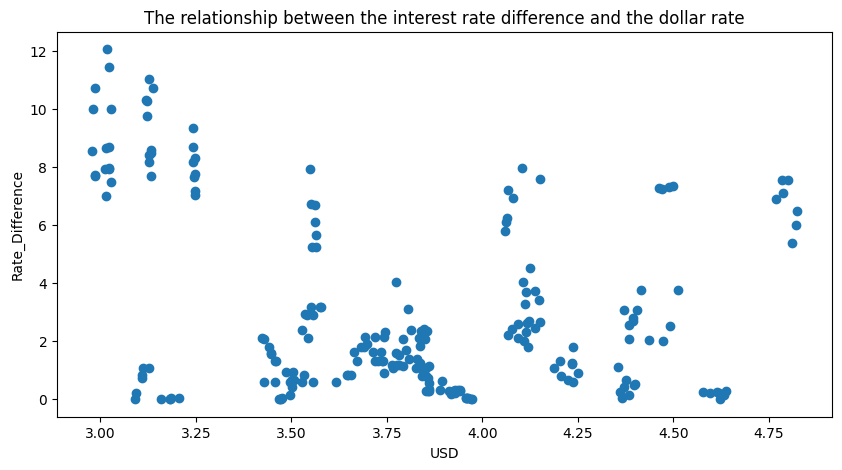

In [184]:
# B - 5
# your code here
import matplotlib.pyplot as plt
israeli_ribit = []
american_ribit = []
ratee =[]
usd = []

for index, row in USD_AND_RIBIT.iterrows():
    # israeli_ribit.append(row["OBS_VALUE"])
    # american_ribit.append(row[" value"])
    ratee.append(row["Rate_Difference"])
    usd.append(row["USD"])
    
plt.figure(figsize=(10,5))

plt.scatter(usd,ratee)
plt.title("The relationship between the interest rate difference and the dollar rate")
plt.xlabel("USD")
plt.ylabel("Rate_Difference")

plt.show()


In [182]:
USD_AND_RIBIT_2 = USD_AND_RIBIT.copy()

a = USD_AND_RIBIT_2.drop(["Rate_Comparison","month","year","chang_between_months_x","chang_between_months","chang_between_months_y"], axis=1)

a.corr()

,value,OBS_VALUE,Rate_Difference,USD
value,1.000000,0.778894,0.514374,-0.118233
OBS_VALUE,0.778894,1.000000,0.907100,-0.245967
Rate_Difference,0.514374,0.907100,1.000000,-0.313368
USD,-0.118233,-0.245967,-0.313368,1.000000


## Part C: Analyzing Relationships Between DataFrames
1. Analyze whether increases in US interest rates are associated with increases or decreases in the USD to ILS exchange rate in the same month.

2. Determine if changes in the Israeli interest rate have a stronger impact on the exchange rate than changes in the US interest rate.

3. Find any time lags in the effect of interest rate changes on the exchange rate. For example, does a change in US interest rates affect the exchange rate in the following month?
(כלומר- האם כשיש שינוי בריבית כלשהי - האם מייד יש שינוי בשער ההמרה? או שיש דיליי של חודש/חודשים עד שמרגישים את ההשפעה - אם בכלל?)

4. Calculate the rolling past 3-month average of the exchange rate for each data time, and add it as a new column.

5. Identify any periods where both US and Israeli interest rates were decreasing, and analyze how the exchange rate behaved during those periods.



In [ ]:
# Bonus 

# Bonus
choose 3 global / local events or periods that you think could have affected the exchange rate or interest rates
and analyze the effect of these events on the data you collected.
show proof of your analysis that supports your claim.

(כלומר- תבחנו אירועים שקרו בתקופה שאתם עובדים עליה ובדקו איך הם השפיעו על הנתונים שאתם עובדים איתם)
למשל: בחירות בארה״ב, בחירות בישראל, רוסיה אוקראינה, מלחמות בישראל וכו׳.

In [ ]:
# Your code here